In [45]:
import requests
import json
import pandas as pd

In [52]:
query = """{
  pairs (first:1000, orderBy:txCount,orderDirection:desc){
    createdAtTimestamp,
    txCount,
    reserveETH,
    reserveUSD,
    volumeUSD,
    totalSupply,
    id
  }
    

}"""

In [53]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
# print(r.text)

200


In [54]:
json_data = json.loads(r.text)

In [55]:
df_data = json_data['data']['pairs']
df = pd.DataFrame(df_data)
df.rename(columns={"createdAtTimestamp": "Timestamp", "id": "Pool id","reserveETH":"Base currency quantity traded",
                   "reserveUSD":"Quote currency quantity traded","totalSupply":"Liquidity in pool","txCount":"Side",
                  "volumeUSD":"Volume in USD"})

,Timestamp,Pool id,Base currency quantity traded,Quote currency quantity traded,Liquidity in pool,Side,Volume in USD
0,1589850429,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,93687.971484408832438352,182043011.0740876351004191754595655,1.212035291602006627,3091004,27759284369.11995868308132649352516
1,1588710145,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,103550.550354153068678374,201206768.448242096986818848899995,1.366480877298581458,2426898,28530398125.04432158520087809080919
2,1589164213,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,39464.961808214921309262,76682514.12808812340312526368993495,581862.372215207342656827,1196727,13538976051.29718772470087034599369
3,1596228131,0x811beed0119b4afce20d2583eb608c6f7af1954f,2809.017701252224561128,5448292.309536970661305627837083997,6209097.439308417317988682,895373,6945291901.744057928496368876869966
4,1600302037,0xd3d2e2692501a5c9ca623199d38826e513033a17,40729.704355037423166824,79140981.53125551778032526946625215,104777.979401543371090102,622086,6634441284.021957520355220446212908
...,...,...,...,...,...,...,...
995,1613326011,0x0bc4428491010dfeaa97e48c70bf4940fa783b40,74.367552218509582014,141986.7224760162055701974118934647,379485.917560488680567709,8972,3079778.980897472499184679480923265
996,1607647242,0x4d3d2bf1db8815e199aec9c10523443204770b64,13.826962162695331248,34261.93834865318653185970649931547,0.577648309567126175,8953,17415187.64398742205184851264047444
997,1599904353,0xac523eb684be6e3fc5ef20a8b2328256b27d36e4,23.460676327697176282,44186.51620399479970637188425362876,394.548438890339674348,8944,0
998,1599117932,0xddd5d0c02ada9b4c0a1a2b3762ae1200528b3167,0.161703554975689409,340.3580176659627779618204867778932,0.000011886227199457,8929,23075503.60893097296910552432628302


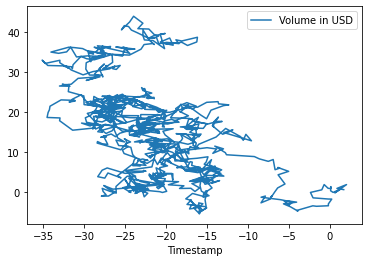

In [60]:
#Plot of Timestamp vs Volume in USD
import numpy as np
import matplotlib.pyplot as plt
dataframe1 = pd.DataFrame(np.random.randn(1000, 2), columns=["Timestamp", "Volume in USD"]).cumsum()
dataframe1["A"] = pd.Series(list(range(len(df))))
dataframe1.plot(x="Timestamp", y="Volume in USD");

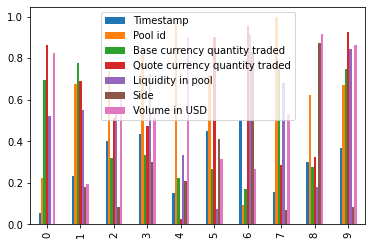

In [73]:
#BAR PLOTTING
df2 = pd.DataFrame(np.random.rand(10, 7), columns=["Timestamp", "Pool id", "Base currency quantity traded", 
                                                   "Quote currency quantity traded","Liquidity in pool","Side",
                                                  "Volume in USD"])
df2.plot.bar();

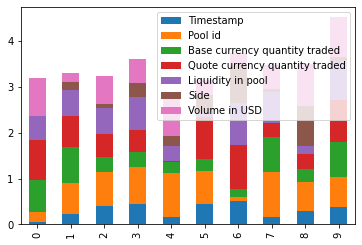

In [74]:
df2.plot.bar(stacked=True);